# begin with the data processing:

In [4]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 39.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 44.4 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 40.6 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 39.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 40.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


load dataset:

In [11]:
def load_json_data(file_path):

    df = pd.read_json(file_path, lines = True)

    return df

In [12]:
def get_memory_sizes(df):
    
    rows = len(df)
    mem = df.memory_usage(index = True, deep = True)
    total_mem = mem.sum()
    image_count = (df['images'] == '[]').sum()
    col_type = df['images'].dtype

    print("number of columns without images:\n", image_count)
    print(f"type in col images is:\n {col_type}")
    print("Size of each column in bytes:\n", mem)
    print("Total size of dataset:\n", total_mem/1000000, "MB")
    print("average size of row:\n", total_mem/rows, "bytes")

drop 0 star review as faulty

In [13]:
def drop_zero(df):

    df = df[df['rating'] != 0]

    return df

Combine Title and Text into new column

In [14]:
def full_review(df):

    df['rev'] = df['text'] + ' ' + df['title']

    return df

In [ ]:
if __name__ == "__main__":
    print("begin loading:")
    file_path = "Arts_Crafts_and_Sewing.jsonl"
    df = load_json_data(file_path)

    df = drop_zero(df)
    print("Data loaded successfully.")
    print("Dataset shape:", df.shape)
    print("Columns:", df.columns)
    print("Star distribution:\n", df['rating'].value_counts())
    df = full_review(df)
    
    get_memory_sizes(df)
   

begin loading:


# Snapshots of columns

print the first few instances of each column

In [7]:
def print_heads(df):

    pd.set_option('display.max_colwidth', None)
    
    display(df.head())

In [8]:
if __name__ == '__main__':

    print_heads(df)

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,rev
0,1,Received damaged. Has hole in mold!,[[VIDEOID:2a7ad2a91afb1e17ff4a1c143f7e10a2]] Received a damaged item. The mold has a hole in it making it useless. I am hoping to get it replaced as it is worthless to me as-is. I will update my review later.,"[{'small_image_url': 'https://m.media-amazon.com/images/I/61v8njU5Q9L._SL256_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/61v8njU5Q9L._SL800_.jpg', 'large_image_url': 'https://m.media-amazon.com/images/I/61v8njU5Q9L._SL1600_.jpg', 'attachment_type': 'IMAGE'}]",B095RKB9N3,B095RXT585,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2022-08-21 19:55:19.157,0,True,[[VIDEOID:2a7ad2a91afb1e17ff4a1c143f7e10a2]] Received a damaged item. The mold has a hole in it making it useless. I am hoping to get it replaced as it is worthless to me as-is. I will update my review later. Received damaged. Has hole in mold!
1,3,3rd one arrived scratched/dented.,3rd one that arrived damaged! I give up!,"[{'small_image_url': 'https://m.media-amazon.com/images/I/616VCPNY6JL._SL256_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/616VCPNY6JL._SL800_.jpg', 'large_image_url': 'https://m.media-amazon.com/images/I/616VCPNY6JL._SL1600_.jpg', 'attachment_type': 'IMAGE'}, {'small_image_url': 'https://m.media-amazon.com/images/I/6196kpc42AL._SL256_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/6196kpc42AL._SL800_.jpg', 'large_image_url': 'https://m.media-amazon.com/images/I/6196kpc42AL._SL1600_.jpg', 'attachment_type': 'IMAGE'}, {'small_image_url': 'https://m.media-amazon.com/images/I/71DJCHJqOIL._SL256_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/71DJCHJqOIL._SL800_.jpg', 'large_image_url': 'https://m.media-amazon.com/images/I/71DJCHJqOIL._SL1600_.jpg', 'attachment_type': 'IMAGE'}, {'small_image_url': 'https://m.media-amazon.com/images/I/71Rem87zrFL._SL256_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/71Rem87zrFL._SL800_.jpg', 'large_image_url': 'https://m.media-amazon.com/images/I/71Rem87zrFL._SL1600_.jpg', 'attachment_type': 'IMAGE'}, {'small_image_url': 'https://m.media-amazon.com/images/I/71b3lytzUgL._SL256_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/71b3lytzUgL._SL800_.jpg', 'large_image_url': 'https://m.media-amazon.com/images/I/71b3lytzUgL._SL1600_.jpg', 'attachment_type': 'IMAGE'}, {'small_image_url': 'https://m.media-amazon.com/images/I/71l5+uA7uqL._SL256_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/71l5+uA7uqL._SL800_.jpg', 'large_image_url': 'https://m.media-amazon.com/images/I/71l5+uA7uqL._SL1600_.jpg', 'attachment_type': 'IMAGE'}, {'small_image_url': 'https://m.media-amazon.com/images/I/71oQDaGiA7L._SL256_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/71oQDaGiA7L._SL800_.jpg', 'large_image_url': 'https://m.media-amazon.com/images/I/71oQDaGiA7L._SL1600_.jpg', 'attachment_type': 'IMAGE'}, {'small_image_url': 'https://m.media-amazon.com/images/I/81VSdtmUUZL._SL256_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/81VSdtmUUZL._SL800_.jpg', 'large_image_url': 'https://m.media-amazon.com/images/I/81VSdtmUUZL._SL1600_.jpg', 'attachment_type': 'IMAGE'}]",B08PNNKNSQ,B07QXN7TMP,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2022-06-19 05:01:15.170,0,True,3rd one that arrived damaged! I give up! 3rd one arrived scratched/dented.
2,1,Abominable. NOT COLOR SHIFT! False Advertising!,"These are regular mica powders! One appears to have had some interference added, but the others are devoid of the addition. They have literally just mixed 3 colors together so instead of getting the cute colors they advertise in their photos you get an ugly brown from the purple/red-blue/green, a gold from the blue/green/gold & a bronze from the yellow/orange/bronze. Only one of my envelopes even appeared to have the added micas. Two envelopes appeared to only have the hold mica and bronze mica without the additional two colo

# make charts

bar chart of star counts

In [9]:
def make_hist(df):

    rating = df['rating']
    x = rating.unique()
    y = rating.value_counts(sort = False)

    plt.bar(x, y)
    plt.title("Star counts")
    plt.ylabel('Number of reviews')
    plt.xlabel('Star rating')
    plt.show
    plt.savefig('starcounts.jpg')

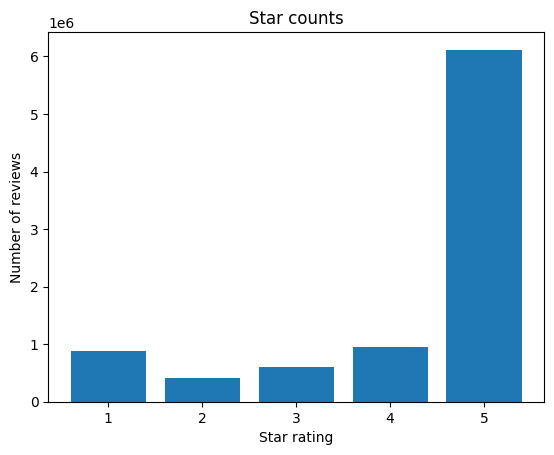

In [10]:
if __name__ == "__main__":

    make_hist(df)

# find rating based on length of review

In [11]:
def len_vs_star(df):

    x = df['text'].astype(str).str.len()
    y = df['rating']

    plt.scatter(x,y)
    plt.title("Sentiment from review length")
    plt.xlabel('review length')
    plt.ylabel('stars')

    plt.show
    plt.savefig('reviewlen.jpg')

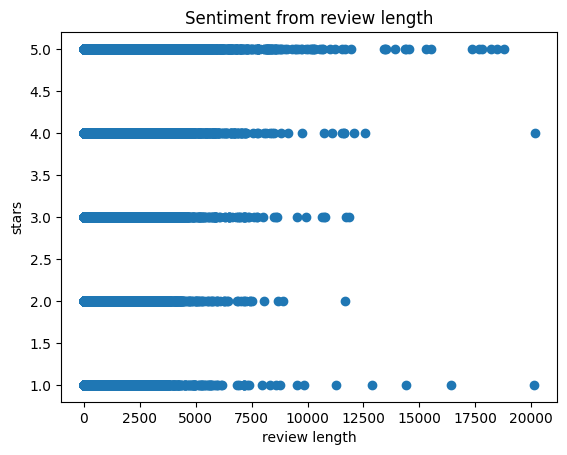

In [12]:
if __name__ == "__main__":
    len_vs_star(df)

# find rating based on helpful votes

In [13]:
def helpful(df):

    x = df['helpful_vote']
    y = df['rating']

    plt.scatter(x, y)
    plt.title("Sentiment from helpful votes")
    plt.xlabel('number of users who found the review helpful')
    plt.ylabel('rating of review')

    plt.show
    plt.savefig('helpful.jpg')

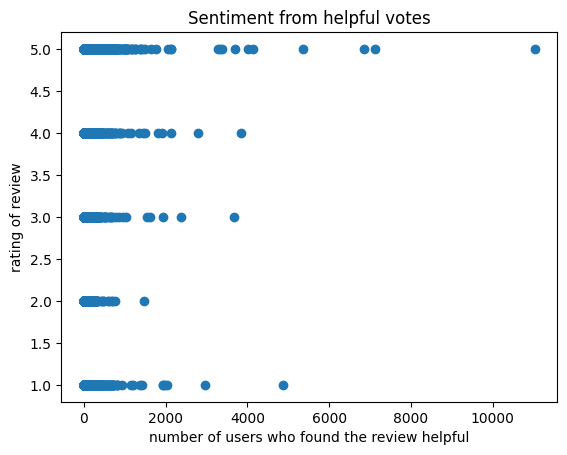

In [14]:
if __name__ == "__main__":

    helpful(df)

# Make Wordclouds

# Make proportionate

In [15]:
def df_prop(df):

    """
    Cut number of 5 star reviews down to stop skewing data
    """

    key = 5
    pctg = 0.8

    drop_idx = df[df['rating'] == key].index

    num = int(len(drop_idx) * pctg)
    ran_idx = np.random.choice(drop_idx, size = num, replace = False)

    df_filtered = df.drop(ran_idx)

    return df_filtered

### make bar chart

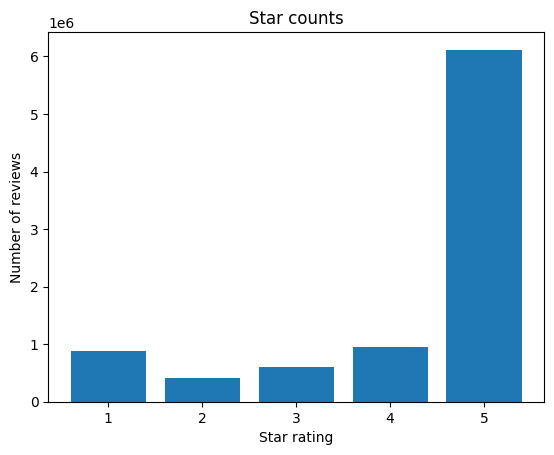

In [16]:
if __name__ == "__main__":

    df_filtered = df_prop(df)
    make_hist(df)

In [17]:
def make_prop_hist(df):

    rating = df['rating']
    x = rating.unique()
    y = rating.value_counts(sort = False)

    plt.bar(x, y)
    plt.title("Proportional star counts")
    plt.ylabel('Number of reviews')
    plt.xlabel('Star rating')
    plt.show
    plt.savefig('starcounts_prop.jpg')

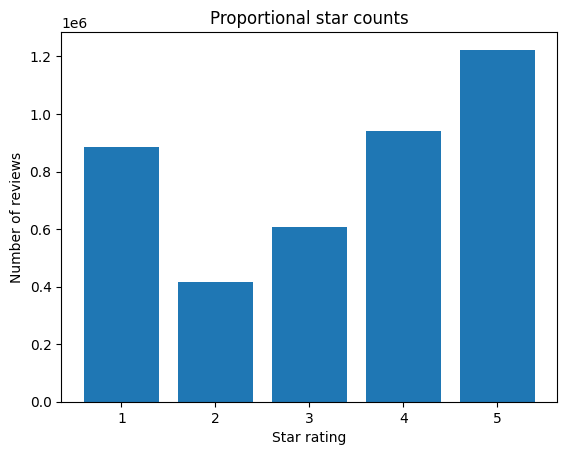

In [18]:
if __name__ == "__main__":

    make_prop_hist(df_filtered)

# Establish training and testing set

In [19]:
def split_data(df, train_proportion, test_proportion, random_state=None):
    """
    Split the data into training and testing sets.
    IN: df, pd.DataFrame, the entire dataset
        train_proportion, float, proportion of samples for the training set
        test_proportion, float, proportion of samples for the test set
        random_state, int, seed for random number generator
    OUT: X_train, pd.Series, training data
         X_test, pd.Series, testing data
         y_train, pd.Series, training labels
         y_test, pd.Series, testing labels
    """
    # Your code here#
    X = df['rev']
    y = df['rating']

    display(X.info())
    display(y.info())

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_proportion, train_size = train_proportion,stratify=y, random_state = random_state)


    return X_train, X_test, y_train, y_test

In [20]:
if __name__ == "__main__":
    train_proportion, test_proportion = 0.8, 0.2
    X_train, X_test, y_train, y_test = split_data(
        df_filtered,
        train_proportion=train_proportion,
        test_proportion=test_proportion,
        random_state=42,
    )
    print("Data split into training and testing sets.")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)

<class 'pandas.core.series.Series'>
Index: 4073592 entries, 0 to 8966757
Series name: rev
Non-Null Count    Dtype 
--------------    ----- 
4073592 non-null  object
dtypes: object(1)
memory usage: 62.2+ MB


None

<class 'pandas.core.series.Series'>
Index: 4073592 entries, 0 to 8966757
Series name: rating
Non-Null Count    Dtype
--------------    -----
4073592 non-null  int64
dtypes: int64(1)
memory usage: 62.2 MB


None

Data split into training and testing sets.
X_train shape: (3258873,)
X_test shape: (814719,)


# vectorize

In [21]:
def fit_vectorizer(X_train, stops):
    """
    Vectorize the text data using CountVectorizer.
    IN: X_train, pd.Series, training text data
    OUT: X_train_vec, scipy.sparse.csr_matrix, vectorized training data
    """
    # Your code here
    vectorizer = CountVectorizer(stop_words = stops)
    vectorizer = vectorizer.fit(X_train)
    X_train_vec = vectorizer.transform(X_train)

    return X_train_vec, vectorizer

In [22]:
def transform_test_data(vectorizer, X_test):
    """
    Transform the test data using the fitted vectorizer.
    IN: vectorizer, CountVectorizer, fitted vectorizer
        X_test, pd.Series, testing text data
    OUT: X_test_vec, scipy.sparse.csr_matrix, vectorized testing data
    """
    # Your code here
    X_test_vec = vectorizer.transform(X_test)

    return X_test_vec

In [71]:
if __name__ == "__main__":
    stops = ["use", "used", "using", "br", "color", "one", "bought", "work", "colors", "like", "product", "make", "time"]
    stop_words = list(text.ENGLISH_STOP_WORDS) + stops
    X_train_vec, vectorizer = fit_vectorizer(X_train, stop_words)
    X_test_vec = transform_test_data(vectorizer, X_test)
    print("Text data vectorized.")
    print("X_train_vec shape:", X_train_vec.shape)
    print("X_test_vec shape:", X_test_vec.shape)

Text data vectorized.
X_train_vec shape: (3258873, 245470)
X_test_vec shape: (814719, 245470)


# Train NBModel

In [72]:
def train_nb_classifier(X_train_vec, y_train):
    """
    Train a Multinomial Naive Bayes classifier.
    IN: X_train_vec, scipy.sparse.csr_matrix, vectorized training data
        y_train, pd.Series, training labels
    OUT: model, trained MultinomialNB classifier
    """
    # Your code here
    model = MultinomialNB()
    model = model.fit(X_train_vec, y_train)

    return model

In [73]:
if __name__ == "__main__":
    nb_model = train_nb_classifier(X_train_vec, y_train)
    print("Multinomial Naive Bayes model trained successfully.")

Multinomial Naive Bayes model trained successfully.


# Evaluations

In [74]:
def make_predictions(model, X_test_vec):
    """
    Make predictions on the test set.
    IN: model, trained classifier
        X_test_vec, scipy.sparse.csr_matrix, vectorized testing data
    OUT: y_pred, np.ndarray, predicted labels
    """
    # Your code here
    y_pred = model.predict(X_test_vec)

    return y_pred

In [75]:
if __name__ == "__main__":
    y_pred = make_predictions(nb_model, X_test_vec)
    print("Predictions made on the test set.")

Predictions made on the test set.


In [76]:
def compute_metrics(y_true, y_pred):
    """
    Compute the confusion matrix and classification report.
    IN: y_true, pd.Series, true labels
        y_pred, np.ndarray, predicted labels
    OUT: cm, np.ndarray, confusion matrix
         report, str, classification report
    """
    # Your code here
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    return cm, report

In [77]:
def plot_confusion_matrix(cm, class_names):
    """
    Plot the confusion matrix.
    IN: cm, np.ndarray, confusion matrix
        class_names, list of str, names of the classes
    OUT: None
    """
    """cm = cm.T"""
    plt.figure(figsize=(8, 6))
    # Your code here
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_names, yticklabels = class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show
    plt.savefig('confusion.jpg')

Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.77      0.71    176723
           2       0.32      0.12      0.18     83426
           3       0.39      0.35      0.36    121442
           4       0.47      0.41      0.44    188469
           5       0.67      0.82      0.74    244659

    accuracy                           0.57    814719
   macro avg       0.50      0.50      0.49    814719
weighted avg       0.54      0.57      0.55    814719



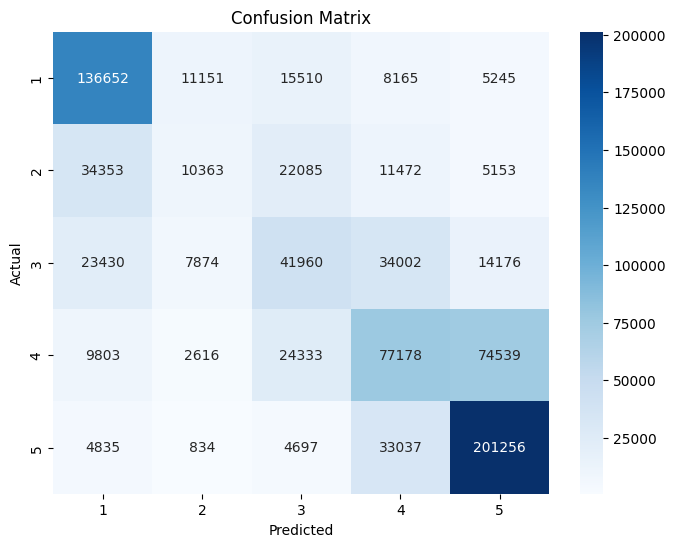

In [78]:
if __name__ == "__main__":
    cm, report = compute_metrics(y_test, y_pred)
    print("Classification Report:\n", report)
    plot_confusion_matrix(cm, class_names=['1', '2', '3', '4', '5'])

# Train Logistic Regression Model

In [79]:
def train_log_model(X_train_vec, y_train):
    """
    large number of iterations required
    """
    log_model = LogisticRegression(max_iter = 10000)
    log_model = log_model.fit(X_train_vec, y_train)

    return log_model

In [80]:
if __name__ == "__main__":
    print("begin training:\n")
    log_model = train_log_model(X_train_vec, y_train)
    print("Logistic Regression model trained successfully.")

begin training:

Logistic Regression model trained successfully.


# Evaluations

In [81]:
def make_predictions(model, X_test_vec):
    """
    Make predictions on the test set.
    IN: model, trained classifier
        X_test_vec, scipy.sparse.csr_matrix, vectorized testing data
    OUT: y_pred, np.ndarray, predicted labels
    """
    # Your code here
    y_pred = model.predict(X_test_vec)

    return y_pred

In [82]:
if __name__ == "__main__":
    y_pred_log = make_predictions(log_model, X_test_vec)
    print("Predictions made on the test set.")

Predictions made on the test set.


In [83]:
def compute_metrics_log(y_true, y_pred):
    """
    Compute the confusion matrix and classification report.
    IN: y_true, pd.Series, true labels
        y_pred, np.ndarray, predicted labels
    OUT: cm, np.ndarray, confusion matrix
         report, str, classification report
    """
    # Your code here
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    return cm, report

In [84]:
def plot_confusion_matrix_log(cm, class_names):
    """
    Plot the confusion matrix.
    IN: cm, np.ndarray, confusion matrix
        class_names, list of str, names of the classes
    OUT: None
    """
    """cm = cm.T"""
    plt.figure(figsize=(8, 6))
    # Your code here
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_names, yticklabels = class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show
    plt.savefig('confusionlog.jpg')
    

Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.83      0.72    176723
           2       0.34      0.10      0.15     83426
           3       0.42      0.32      0.36    121442
           4       0.50      0.43      0.46    188469
           5       0.67      0.84      0.75    244659

    accuracy                           0.59    814719
   macro avg       0.51      0.50      0.49    814719
weighted avg       0.55      0.59      0.56    814719



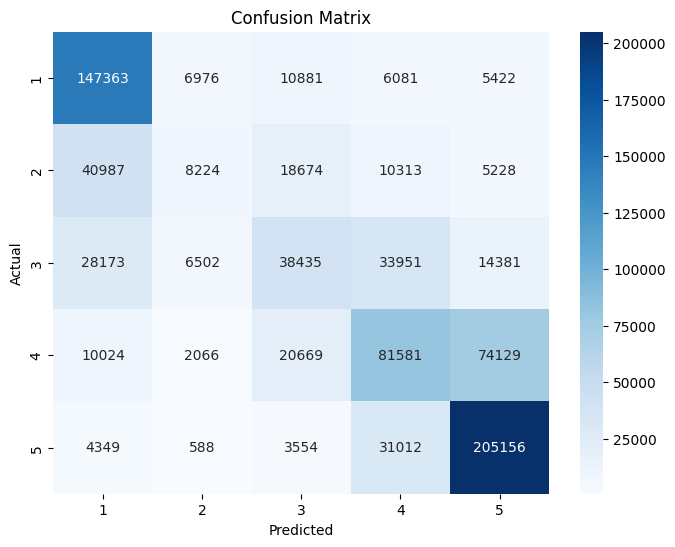

In [85]:
if __name__ == "__main__":
    cm, report = compute_metrics_log(y_test, y_pred_log)
    print("Classification Report:\n", report)
    plot_confusion_matrix_log(cm, class_names=['1', '2', '3', '4', '5'])

# Make Wordclouds

In [86]:
def make_clouds1(df, stops):

    df1 = df[df['rating'] == 1]
    cloud1str = ''.join(df1['text'].tolist())
    wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', stopwords=stops).generate(cloud1str)

    plt.figure(figsize = (10, 15))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.title("1 Star cloud")
    plt.show()
    #plt.savefig('3starcloud.jpg')
    wordcloud.to_file("1starcloud.jpg")
        

In [87]:
def make_clouds2(df, stops):

    df1 = df[df['rating'] == 2]
    cloud1str = ''.join(df1['text'].tolist())
    wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', stopwords=stops).generate(cloud1str)

    plt.figure(figsize = (10, 15))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.title("2 Star cloud")
    plt.show()
    #plt.savefig('4starcloud.jpg')
    wordcloud.to_file("2starcloud.jpg")
        

In [88]:
def make_clouds3(df, stops):

    df1 = df[df['rating'] == 3]
    cloud1str = ''.join(df1['text'].tolist())
    wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', stopwords=stops).generate(cloud1str)

    plt.figure(figsize = (10, 15))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.title("3 Star cloud")
    plt.show()
    #plt.savefig('3starcloud.jpg')
    wordcloud.to_file("3starcloud.jpg")
        

In [89]:
def make_clouds4(df, stops):

    df1 = df[df['rating'] == 4]
    cloud1str = ''.join(df1['text'].tolist())
    wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', stopwords=stops).generate(cloud1str)

    plt.figure(figsize = (10, 15))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.title("4 Star cloud")
    plt.show()
    #plt.savefig('3starcloud.jpg')
    wordcloud.to_file("4starcloud.jpg")
        

In [90]:
def make_clouds5(df, stops):

    df1 = df[df['rating'] == 5]
    cloud1str = ''.join(df1['text'].tolist())
    wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', stopwords=stops).generate(cloud1str)

    plt.figure(figsize = (10, 15))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.title("5 Star cloud")
    plt.show()
    #plt.savefig('5starcloud.jpg')
    wordcloud.to_file("5starcloud.jpg")
        

making clouds:



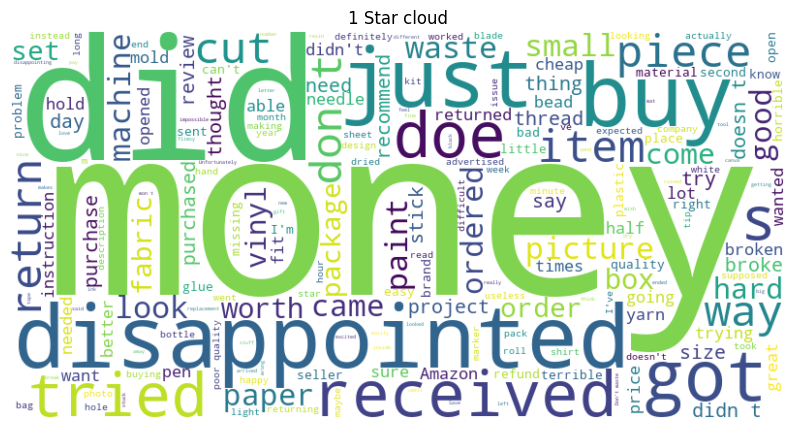

cloud 1 done



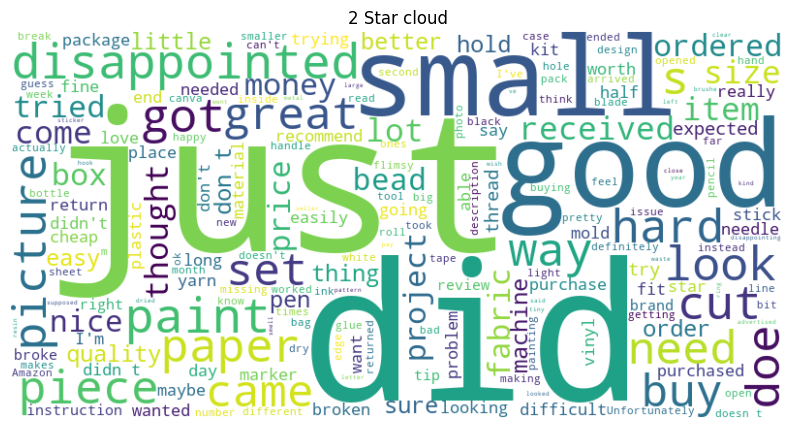

cloud 2 done



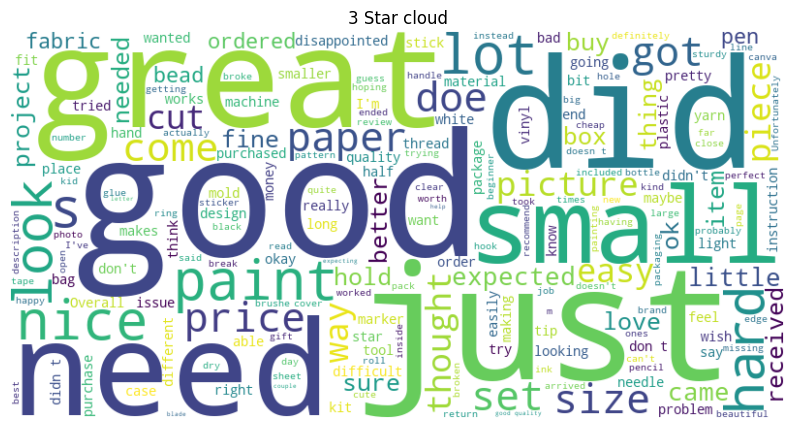

cloud 3 done



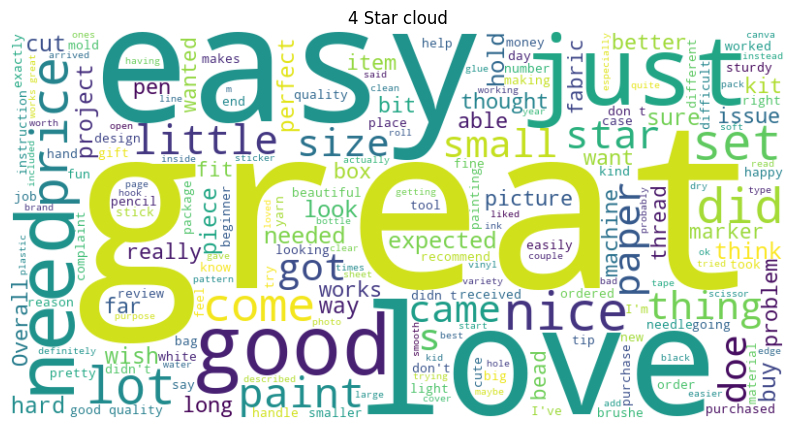

cloud 4 done



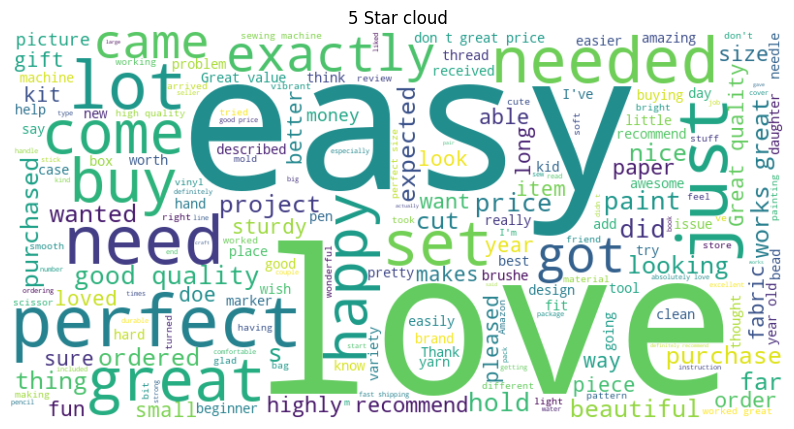

cloud 5 done



In [91]:
if __name__ == "__main__":
    print("making clouds:\n")
    make_clouds1(df, stop_words)
    print("cloud 1 done\n")
    make_clouds2(df, stop_words)
    print("cloud 2 done\n")
    make_clouds3(df, stop_words)
    print("cloud 3 done\n")
    make_clouds4(df, stop_words)
    print("cloud 4 done\n")
    make_clouds5(df, stop_words)
    print("cloud 5 done\n")